In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

%load_ext autoreload
%autoreload 2
import plotter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
training_dir = '../../clust/results_wp/training_wp_nonolap'
r, val = np.loadtxt(f'{training_dir}/wp_cosmo_0_HOD_0_test_0.dat', delimiter=',', unpack=True)

training_dir = '../../clust/results_wp/training_wp_nonolap'
r2, val2 = np.loadtxt(f'{training_dir}/wp_cosmo_16_HOD_1626_test_0.dat', delimiter=',', unpack=True)

rs = [r, r2]
vals = [val, val2]

In [21]:
print(rs)
print(vals)

[array([ 0.141235,  0.281727,  0.561971,  1.120984,  2.236068,  4.460367,
        8.897257, 17.747683, 35.401953]), array([ 0.141235,  0.281727,  0.561971,  1.120984,  2.236068,  4.460367,
        8.897257, 17.747683, 35.401953])]
[array([5.118165e+03, 2.125562e+03, 7.001919e+02, 1.737314e+02,
       9.358893e+01, 5.470286e+01, 3.020630e+01, 1.364349e+01,
       4.631059e+00]), array([4198.843   , 2092.623   ,  872.3209  ,  280.3502  ,  119.3359  ,
         67.07319 ,   36.63981 ,   17.34823 ,    6.119862])]


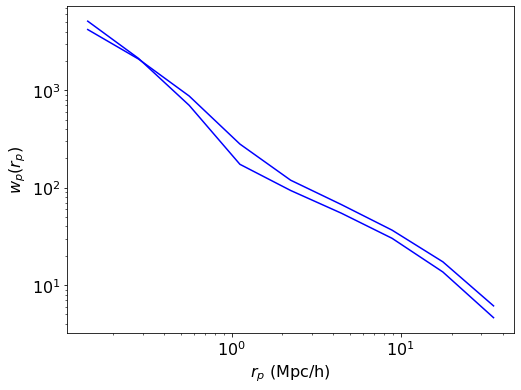

In [23]:
plotter.plot_wp_simple(rs, vals)

In [50]:
def plot_training(statistic, res_dir, data_dir, errtag='', subsample=None, version=None, nbins=9, test=False):
    plt.figure(figsize=(10,8)) 
    ps = []

    CC = range(0, 40)
    #CC = range(0,1)
    #HH = np.loadtxt("../CMASS/Gaussian_Process/GP/HOD_random_subsample_{}_version_{}.dat".format(subsample, version))
    #HH = np.atleast_2d(HH[0][:3])
    nhodnonolap = 100
    nhodpercosmo = 50
    #nhodpercosmo = 1
    HH = np.array(range(0,len(CC)*nhodnonolap))
    HH  = HH.reshape(len(CC), nhodnonolap)
    HH = HH[:,0:nhodpercosmo]
    
    if errtag:
        GP_error = np.loadtxt(f"{res_dir}/{statistic}_error{errtag}.dat")
    
    #color_idx = np.linspace(0, 1, np.max(HH)+1)
    color_idx = np.linspace(0, 1, len(CC))

    for cosmo in CC:
        HH_set = HH[cosmo]
        for hod in HH_set:
            zz = np.random.randint(len(HH.flatten()))
            hod = int(hod)
            color=plt.cm.rainbow(color_idx[cosmo])
            if test:
                for box in range(0,5):
                    fn = '{}/{}_cosmo_{}_Box_{}_HOD_{}_test_0.dat'.format(data_dir, statistic, cosmo, box, hod)
                    r, p = np.loadtxt(fn, delimiter=',',unpack=True)
                    if errtag:
                        plt.errorbar(r[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color, 
                                     zorder=zz)
                    else:
                        plt.plot(r[:nbins], p[:nbins], color=color, lw=0.5, zorder=zz)
            else:
                fn = '{}/{}_cosmo_{}_HOD_{}_test_0.dat'.format(data_dir, statistic, cosmo, hod)
                r, p = np.loadtxt(fn, delimiter=',',unpack=True)
                if errtag:
                    plt.errorbar(r[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color, 
                                 zorder=zz)
                else:
                    plt.plot(r[:nbins], p[:nbins], color=color, lw=0.5, zorder=zz)
                
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    
    if statistic == 'upf':
        plt.ylabel(r"P$_U$(r)")
        
    elif statistic == 'wp':
        plt.ylabel(r'$w_p$($r_p$)')
        plt.xscale('log')

In [51]:
def plot_testing(statistic, testtag, errtag='', nbins=9):
    plt.figure(figsize=(10,8)) 
    ax = plt.gca()

    CC_test = range(0, 7)
    HH_test = range(0, 10)
    #HH_test = [0, 6, 10, 11, 14, 16, 19, 20, 23, 24]#, 25, 26, 27, 28, 29, 32, 33, 38, 41, 43, 44, 47, 
               #50, 52, 57, 58, 59, 60, 64, 68, 71, 72, 74, 75, 77, 81, 82, 83, 84, 85, 87, 91, 97, 99] #good hods  

    res_dir = '../../clust/results_{}/'.format(statistic)
    if errtag:
        GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
    color_idx = np.linspace(0, 1, len(HH_test))
    boxes = range(5)
    
    
    for cosmo in CC_test:
        hodcount = 0
        for hod in HH_test:
            for box in boxes:
                hod = int(hod)
                colidx = hodcount
                color=plt.cm.rainbow(color_idx[colidx])

                idtag = '{}_cosmo_{}_Box_{}_HOD_{}_test_0.dat'.format(statistic, cosmo, box, hod)
                fnt = '{}testing_{}{}/{}'.format(res_dir, statistic, testtag, idtag)
                #fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)

                ntest, ptest = np.loadtxt(fnt, delimiter=',', unpack=True)
                if errtag:
                    plt.errorbar(ntest[:nbins], ptest[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color)
                else:
                    plt.plot(ntest[:nbins], ptest[:nbins], color=color, lw=0.5)
            hodcount += 1
                   
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    ax.legend()
    
    if statistic == 'upf':
        plt.ylabel(r"P$_U$(r)")
        
    elif statistic == 'wp':
        plt.ylabel(r'$w_p$($r_p$)')
        plt.xscale('log')

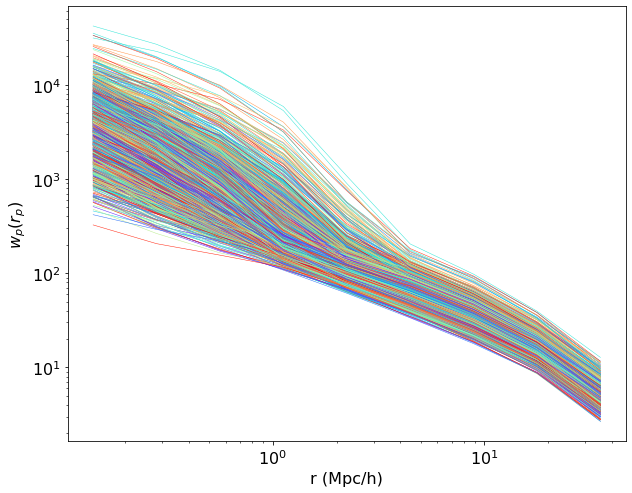

In [47]:
statistic='wp'
traintag = '_nonolap'
errtag = None
res_dir = '../../clust/results_{}'.format(statistic)
data_dir = f'{res_dir}/training_{statistic}{traintag}'
#errtag = '_10hod_test0'
plot_training(statistic, res_dir, data_dir, errtag=errtag)

No handles with labels found to put in legend.


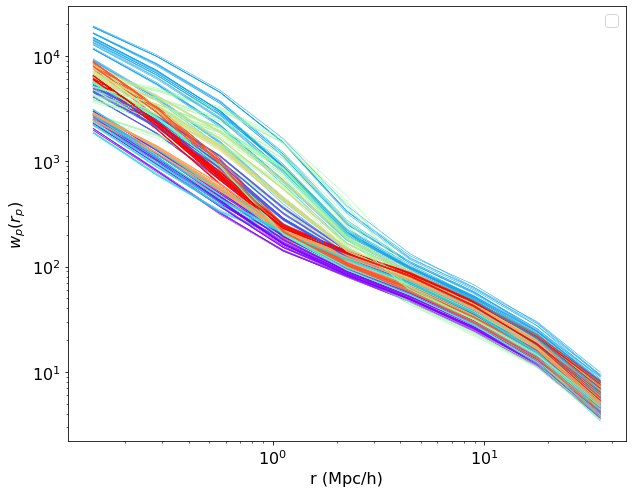

In [55]:
statistic='wp'
testtag = ''
errtag = None
#errtag = '_10hod_test0'
res_dir = '../../clust/results_{}'.format(statistic)
testtag = ''
#data_dir = f'{res_dir}/testing_{statistic}{testtag}'
plot_testing(statistic, testtag)